# Сегментация по кликам с помощью SAM
Ссылка на SAM:
https://github.com/facebookresearch/segment-anything?tab=readme-ov-file#model-checkpoints

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

In [9]:
model_type = "vit_b"
checkpoint_path = '/Users/vinetiger/Работа💸/Авито/PriceAlchemists/PriceAlchemists/models/sam_vit_b_01ec64.pth'
image_path = '/Users/vinetiger/Работа💸/Авито/PriceAlchemists/PriceAlchemists/data/images/16930646197.jpg'

In [10]:
sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
predictor = SamPredictor(sam)

In [11]:
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
predictor.set_image(image_rgb)


In [ ]:
input_points = np.array([
    [150, 200]
]) 
input_labels = np.ones(len(input_points), dtype=int)

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=False 
)

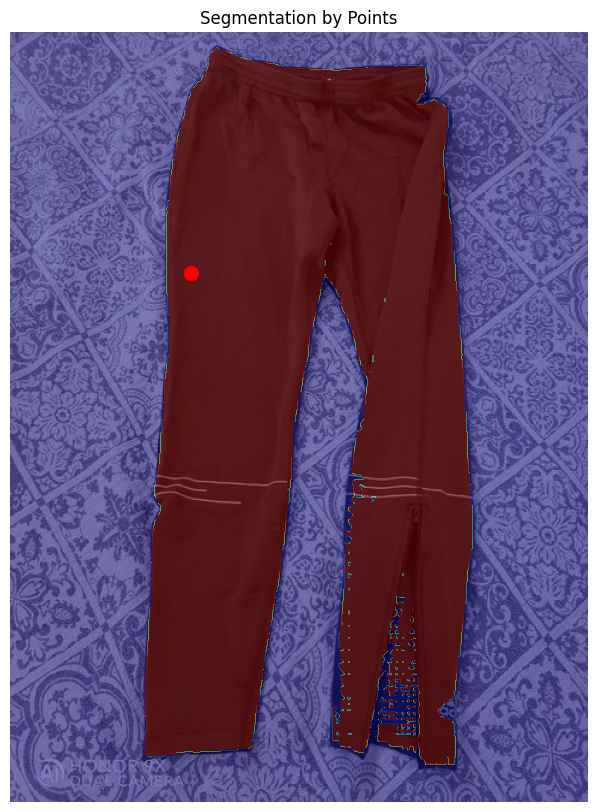

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.imshow(masks[0], alpha=0.5, cmap='jet') 
plt.scatter(input_points[:, 0], input_points[:, 1], color='red', s=100)
plt.title("Segmentation by Points")
plt.axis('off')
plt.show()